# Classification of dog breeds

In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
sz=224
PATH ='Kaggle/dog-breed-identification/'

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.backends.cudnn.enabled

True

In [5]:
arch=resnet34
csv_path=f'{PATH}/labels.csv'
n = len(list(open(csv_path)))
n=n-1
val_idxs = get_cv_idxs(n)

In [6]:
train_path = 'train/'
test_path = 'test/'

In [7]:
data = ImageClassifierData.from_csv(PATH, train_path, csv_path, 64, tfms_from_model(arch, sz), val_idxs, '.jpg', test_path)

In [8]:
conv = ConvLearner.pretrained(arch, data, precompute=True)


## Everything below has been commented because it was used for purposes of understanding the code

In [9]:
#conv.fit(0.01, 5)

In [10]:
#val_pred = conv.predict()
#val_pred

In [11]:
#final_preds = np.exp(val_pred)
#final_preds

In [12]:
learn_rate = conv.lr_find()

 83%|████████▎ | 106/128 [00:01<00:00, 95.08it/s, loss=22]  


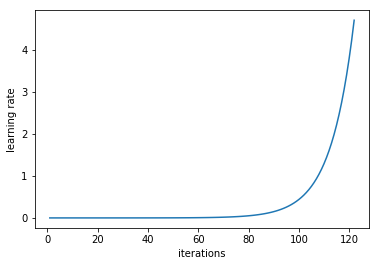

In [13]:
#conv.sched.plot_lr() # plots learning rate!